In [1]:
import mdtraj as md
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

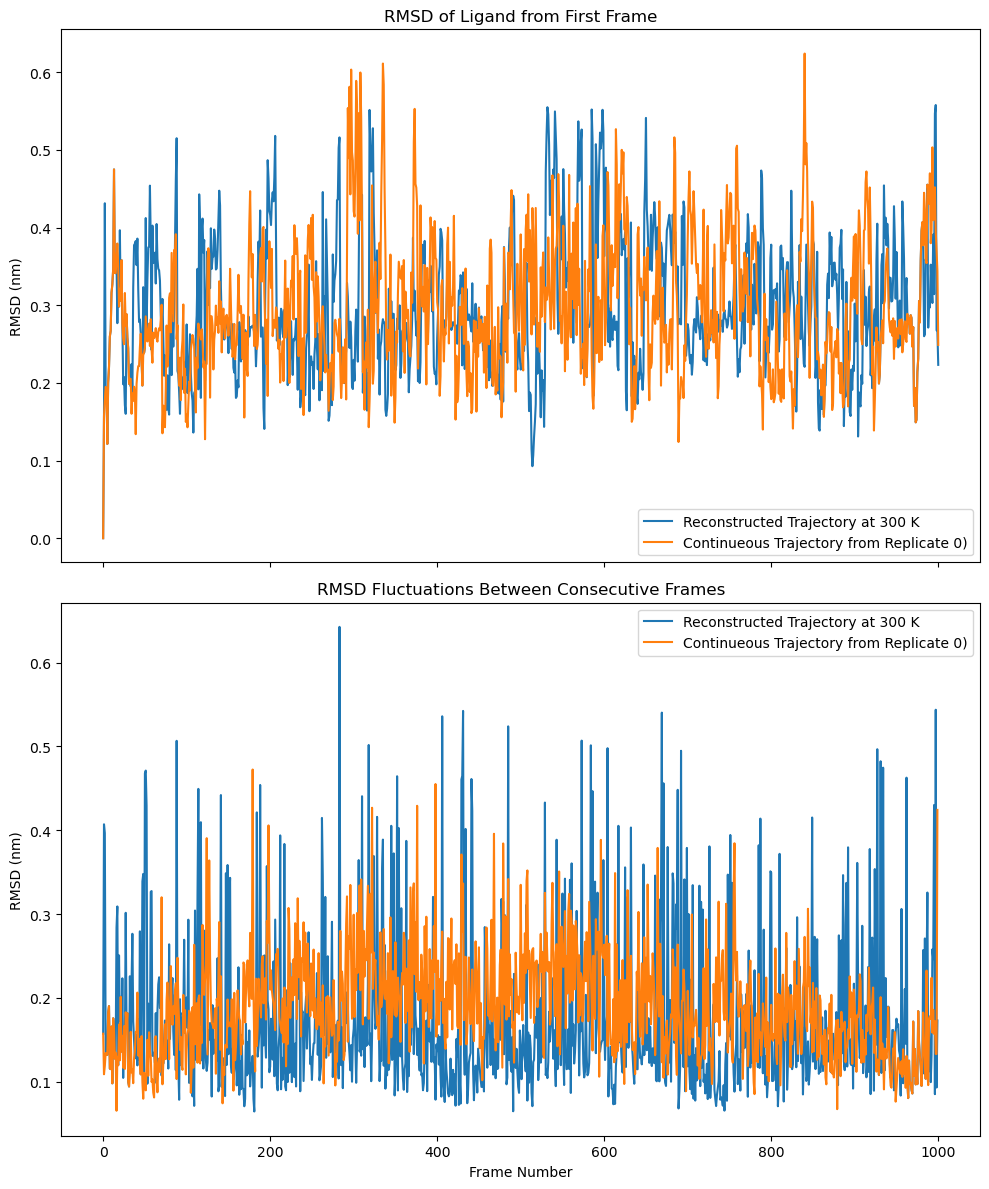

In [19]:
# File paths
gmx_unsorted_trj_path = 'REMD_2/replicate_0/md_pbc_fit.xtc'
gmx_sorted_trj_path = 'REMD_2/0_sorted_md_pbc_fit.xtc'
gmx_top_path = 'REMD_2/gromacs_ligand.gro'
ligand_indices = np.arange(0, 151)

# Initialize lists to store data for plotting
rmsd_first_frame_data = []
rmsd_fluctuations_data = []
labels = ['Reconstructed Trajectory at 300 K', 'Continueous Trajectory from Replicate 0)']

# Loop through each trajectory file to calculate data
for i in [gmx_unsorted_trj_path, gmx_sorted_trj_path]:
    traj = md.load(i, top=gmx_top_path)
    traj.superpose(traj, 0, atom_indices=ligand_indices)
    traj_ligand = traj.atom_slice(ligand_indices)

    # Calculate RMSD from the first frame
    rmsd_first_frame = md.rmsd(traj_ligand, traj_ligand, 0)
    rmsd_first_frame_data.append(rmsd_first_frame)

    # Calculate RMSD fluctuations between consecutive frames
    rmsd_fluctuations = []
    for ii in range(1, traj_ligand.n_frames):
        current_frame = traj_ligand[ii]
        previous_frame = traj_ligand[ii - 1]
        rmsd_val = md.rmsd(current_frame, previous_frame)
        rmsd_fluctuations.append(rmsd_val[0])
    rmsd_fluctuations_data.append(np.array(rmsd_fluctuations))

# Create the figure with two subplots
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot RMSD from the first frame on ax_1
for idx, data in enumerate(rmsd_first_frame_data):
    ax_1.plot(range(len(data)), data, label=labels[idx])
ax_1.set_title('RMSD of Ligand from First Frame')
ax_1.set_ylabel('RMSD (nm)')
ax_1.legend()

# Plot RMSD fluctuations on ax_2
for idx, data in enumerate(rmsd_fluctuations_data):
    ax_2.plot(range(len(data)), data, label=labels[idx])
ax_2.set_title('RMSD Fluctuations Between Consecutive Frames')
ax_2.set_xlabel('Frame Number')
ax_2.set_ylabel('RMSD (nm)')
ax_2.legend()

plt.tight_layout()
plt.show()